# Workshop 02
# Object Detection Using Web Camera By Using YOLO - V4

In [ ]:

import cv2
import numpy as np

# Load YOLOv4 network
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")

# Load the COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Set up video capture for webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    height, width, channels = frame.shape

    # Prepare the image for YOLOv4
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    
    # Get YOLO output
    outputs = net.forward(output_layers)
    
    # Initialize lists to store detected boxes, confidences, and class IDs
    boxes = []
    confidences = []
    class_ids = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Calculate top-left corner of the box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Max Suppression to eliminate redundant overlapping boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels on the image
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]

            color = (0, 255, 0)  # Green color for bounding boxes
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with detected objects
    cv2.imshow("YOLOv4 Real-Time Object Detection", frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()
 

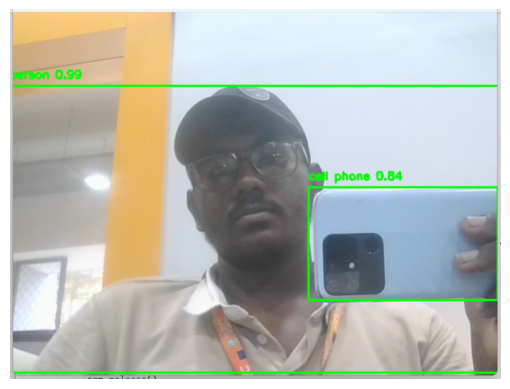

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img =cv2.imread('image.png',cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")  # Hide axes
plt.show()